In [33]:
%matplotlib inline

In [52]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np
    


In [53]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

In [54]:
veg, Nx, Ny = openfile("ti.gslib")
veg_real00000, Nx, Ny = openfile("smallOutput/test_real00000.gslib")

veg veg_real00000


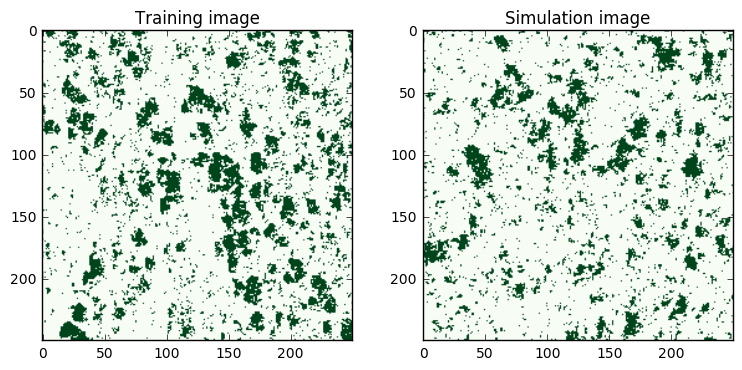

In [55]:
fig = plt.figure(figsize = (9,4))
ax = fig.add_subplot(121)
plt.imshow(veg, cmap = 'Greens')
plt.title('Training image')
ax = fig.add_subplot(122)
plt.imshow(veg_real00000, cmap = 'Greens')
plt.title('Simulation image')
fig.savefig('Success.pdf')


In [94]:
    s =  np.ones((3,3)) # iterate structure
    s[0, 0] = 0  # comment out for queen neighbors
    s[2, 0] = 0
    s[2, 2] = 0
    s[0, 2] = 0


In [93]:
s

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [96]:
import numpy
from scipy import ndimage


def get_patches(fld):
    """
    Returns list of patch sizes
    """
    
    s =  np.ones((3,3)) # iterate structure
    s[0, 0] = 0  # comment out for queen neighbors
    s[2, 0] = 0
    s[2, 2] = 0
    s[0, 2] = 0

    labeled_array, numpatches = ndimage.label(fld,s) # labeling
    sizes = ndimage.sum(fld,labeled_array,range(1,numpatches+1)) 
    return sizes

train_patches = get_patches(veg)
# sim_patches = get_patches(veg_real00000) 

In [98]:
def get_sims():
    import os
    os.chdir('smallOutput/')
    prefixed = [filename for filename in os.listdir('.') if filename.startswith("test")]
    sim_veg = []
    for name in prefixed[:100]:
        sim_veg.append(openfile(name)[0])
    os.chdir('../')
    return sim_veg
sim_veg = get_sims()

veg_real00000 veg_real00001 veg_real00002 veg_real00003 veg_real00004 veg_real00005 veg_real00006 veg_real00007 veg_real00008 veg_real00009 veg_real00010 veg_real00011 veg_real00012 veg_real00013 veg_real00014 veg_real00015 veg_real00016 veg_real00017 veg_real00018 veg_real00019 veg_real00020 veg_real00021 veg_real00022 veg_real00023 veg_real00024 veg_real00025 veg_real00026 veg_real00027 veg_real00028 veg_real00029 veg_real00030 veg_real00031 veg_real00032 veg_real00033 veg_real00034 veg_real00035 veg_real00036 veg_real00037 veg_real00038 veg_real00039 veg_real00040 veg_real00041 veg_real00042 veg_real00043 veg_real00044 veg_real00045 veg_real00046 veg_real00047 veg_real00048 veg_real00049 veg_real00050 veg_real00051 veg_real00052 veg_real00053 veg_real00054 veg_real00055 veg_real00056 veg_real00057 veg_real00058 veg_real00059 veg_real00060 veg_real00061 veg_real00062 veg_real00063 veg_real00064 veg_real00065 veg_real00066 veg_real00067 veg_real00068 veg_real00069 veg_real00070 veg_re

In [99]:
nbins  = 20
numsim = len(sim_veg)  # Number of DeeSee simulations
bins=np.logspace(np.log10(2), np.log10(1000), nbins)
norm = bins[1:] - bins[:-1]
train_counts = plt.histogram(train_patches, bins=bins)[0]


In [101]:
sim_patches = []  # simulated list of patch size arrays 
sim_counts = []   # simulated list of patch counts 
for i in range(numsim):
    sim_patches.append(get_patches(sim_veg[i]))
    counts = plt.histogram(sim_patches[i], bins= bins)[0]
    sim_counts.append(counts)

sim_counts =  np.array(sim_counts) 
#  normed by bin size
sim_counts_normed = sim_counts/np.expand_dims(norm, 0) 
 # cumulative patch size counts:
cum_sim_counts = np.cumsum(sim_counts, 1)*np.expand_dims(norm, 0) 

In [121]:

# array = np.array([np.mean(x) for x in sim_patches])

# sim_means = DescrStatsW(array, weights=weights, ddof=0)

# array = np.array([np.sum(x) for x in sim_patches])/Nx/Ny
# weights = np.array([len(x) for x in sim_patches])
# sim_dens = DescrStatsW(array, weights=weights, ddof=0)


In [122]:
# power law exponent for patch size distribution
def get_alpha(fld, xmin):
    n = fld[fld >= 2].shape[0]
    alpha = 1+ n/np.sum(np.log(fld[fld >= xmin]/xmin))
    sigma = (alpha - 1)/np.sqrt(n)
    return alpha, sigma

train_alpha, train_sigma  = get_alpha(train_patches, 2)


In [123]:
from statsmodels.stats.weightstats import DescrStatsW
sim_alphas = np.array([get_alpha(x, 2)[0] for x in sim_patches])  #    
weights = np.array([len(x) for x in sim_patches])    

alphaStats = DescrStatsW(sim_alphas, weights=weights, ddof=0)

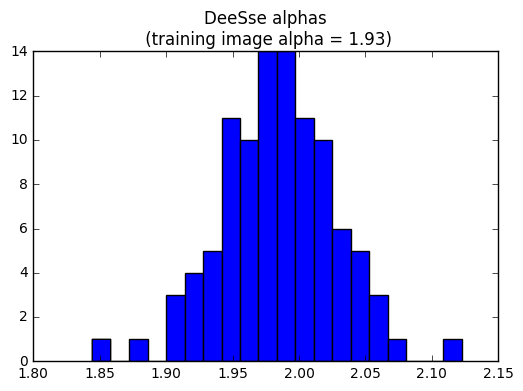

In [125]:
plt.hist(sim_alphas, 20);
plt.title('DeeSse alphas\n (training image alpha = %.2f)' %train_alpha)

In [127]:
print 'Training:'
print '  mean patch density = {0:.3f}'.format(np.sum(train_patches)/Nx/Ny)
print '  mean patch size = {0:.1f}'.format(float(np.mean(train_patches)))
print '  alpha = {0:.2f}, sigma = {1:.2f}'.format(train_alpha, train_sigma)

print 'Simulation: '
print '  mean patch density = {0:.3f} +/- {1:.3f}'.format(sim_dens.mean,sim_dens.std )
print '  mean patch size = {0:.3f} +/- {1:.3f}'.format(sim_means.mean,sim_means.std )
print '  alpha = {0:.2f}, sigma = {1:.2f}'.format(alphaStats.mean, alphaStats.std)


Training:
  mean patch density = 0.204
  mean patch size = 8.6
  alpha = 1.93, sigma = 0.04
Simulation: 
  mean patch density = 0.174 +/- 0.012
  mean patch size = 8.090 +/- 0.738
  alpha = 1.98, sigma = 0.04


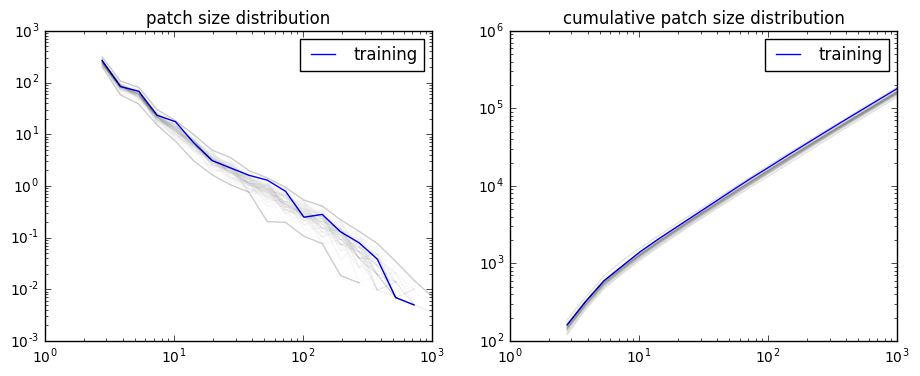

In [128]:
plt.figure(figsize = (11, 4))
plt.subplot(121)

plt.loglog(bins[1:], train_counts/norm, '-', label = 'training')
plt.loglog(bins[1:], sim_counts_normed.T, 'k-', alpha = .01)
plt.loglog(bins[1:], sim_counts_normed.max(0), 'k', alpha = .2)
plt.loglog(bins[1:], sim_counts_normed.min(0), 'k', alpha = .2)
plt.title('patch size distribution')
plt.legend(loc='best')

plt.subplot(122)
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], np.cumsum(train_counts)*norm, '-', label = 'training')
plt.loglog(bins[1:], cum_sim_counts.T, 'k-', alpha = .01)
plt.loglog(bins[1:], cum_sim_counts.max(0), 'k', alpha = .1)
plt.loglog(bins[1:], cum_sim_counts.min(0), 'k', alpha = .1)
plt.title('cumulative patch size distribution')
plt.legend(loc='best')

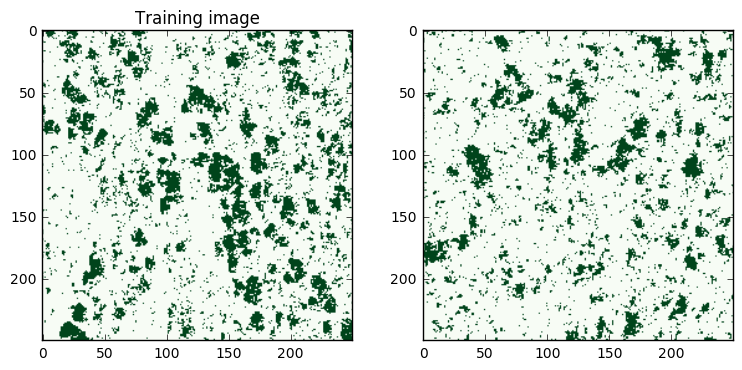

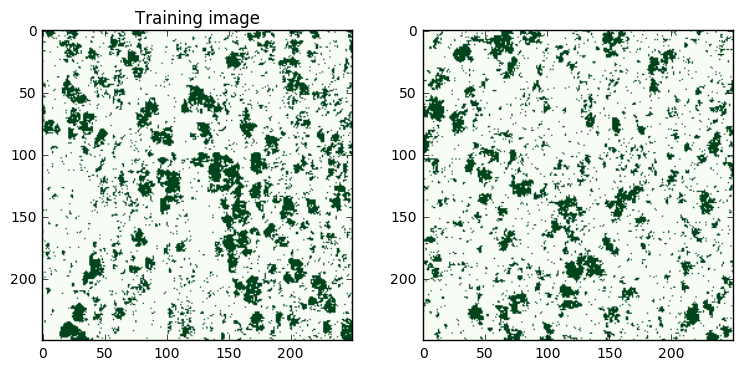

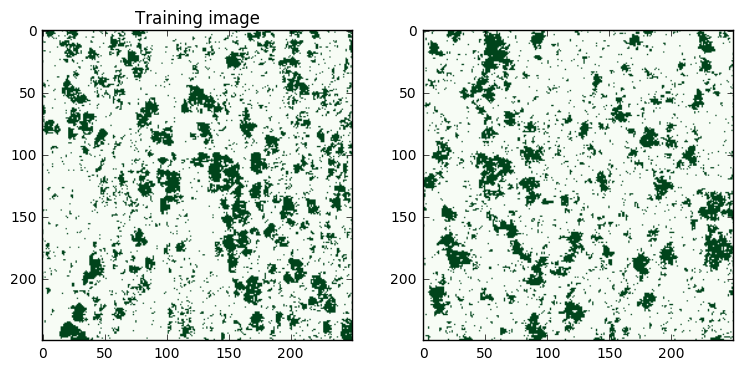

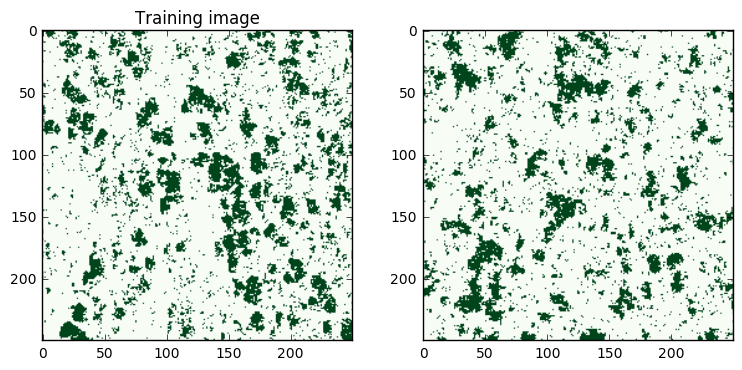

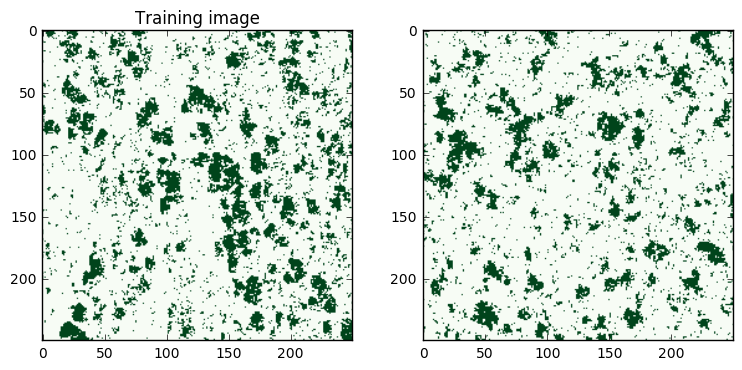

In [129]:
for i in range(5):
    fig = plt.figure(figsize = (9,4))
    ax = fig.add_subplot(121)
    plt.imshow(veg, cmap = 'Greens')
    plt.title('Training image')
    ax = fig.add_subplot(122)
    plt.imshow(sim_veg[i], cmap = 'Greens')
#     plt.title('Simulation image')
#     fig.savefig('../plots/veg{}.pdf'.format(i))